## Marketing Customer Value Analysis Dataset Overview


### 1. Introduction

This dataset provides a comprehensive view of customers related to the auto insurance industry. It encompasses various attributes ranging from demographic factors like gender and education, to data specific to the insurance sector, such as policy type and claim amounts. By analyzing this dataset, businesses can gain insights into customer behavior, evaluate marketing strategies, and optimize customer lifetime value.

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

# Display the first few rows of the dataset
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [84]:
# Summary statistics
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

summary_stats, missing_values

(       Customer Lifetime Value        Income  Monthly Premium Auto  \
 count              9134.000000   9134.000000           9134.000000   
 mean               8004.940475  37657.380009             93.219291   
 std                6870.967608  30379.904734             34.407967   
 min                1898.007675      0.000000             61.000000   
 25%                3994.251794      0.000000             68.000000   
 50%                5780.182197  33889.500000             83.000000   
 75%                8962.167041  62320.000000            109.000000   
 max               83325.381190  99981.000000            298.000000   
 
        Months Since Last Claim  Months Since Policy Inception  \
 count              9134.000000                    9134.000000   
 mean                 15.097000                      48.064594   
 std                  10.073257                      27.905991   
 min                   0.000000                       0.000000   
 25%                   6.0000


### 2. Data Description


<br>

1. **General Information**:
    - **Size**: The dataset contains 9,134 entries with 24 distinct attributes.
    - **Data Types**: It combines both categorical (16 columns) and numerical (8 columns) data types.

2. **Attributes**:
    - **Customer**: A unique identifier for each customer.
    - **State**: The U.S. state in which the customer resides.
    - **Customer Lifetime Value**: A numerical representation of the value of the customer over their lifetime with the company.
    - **Response**: Customer's response to marketing efforts (e.g., Yes or No).
    - **Coverage**: The type of coverage chosen by the customer (e.g., Basic, Extended).
    - **Education**: The education level of the customer.
    - **Effective To Date**: The date when the policy becomes effective.
    - **EmploymentStatus**: The employment status of the customer.
    - **Gender**: Gender of the customer.
    - **Income**: The annual income of the customer.
    - **Location Code**: The type of location where the customer resides (e.g., Urban, Suburban).
    - **Marital Status**: Marital status of the customer.
    - **Monthly Premium Auto**: The monthly premium for the auto insurance.
    - **Months Since Last Claim**: The number of months since the customer's last claim.
    - **Months Since Policy Inception**: The duration since the policy started.
    - **Number of Open Complaints**: The number of unresolved complaints from the customer.
    - **Number of Policies**: The total number of policies the customer holds.
    - **Policy Type & Policy**: Details about the policy chosen by the customer.
    - **Renew Offer Type**: The type of renewal offer provided to the customer.
    - **Sales Channel**: The channel through which the policy was sold (e.g., Agent, Call Center).
    - **Total Claim Amount**: The total amount claimed by the customer.
    - **Vehicle Class & Vehicle Size**: Information about the customer's vehicle.

3. **Correlation Analysis**: Through correlation analysis, it was determined that there is a relationship between 'Customer Lifetime Value' and both 'Coverage' and 'Monthly Premium Auto'.


### 3. Exploratory Data Analysis (EDA)

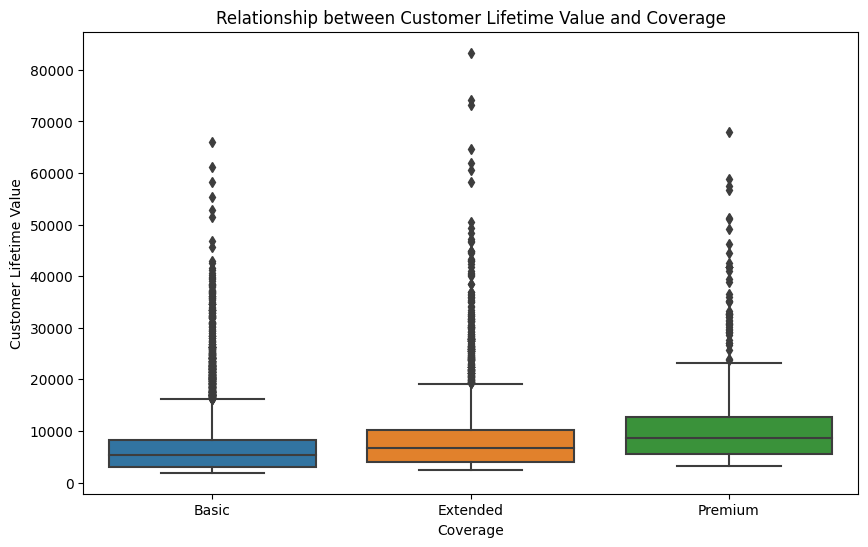

In [85]:
# Plotting the relationship between 'Customer Lifetime Value' and 'Coverage' using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Coverage'], y=data['Customer Lifetime Value'], order=["Basic", "Extended", "Premium"])
plt.title('Relationship between Customer Lifetime Value and Coverage')
plt.xlabel('Coverage')
plt.ylabel('Customer Lifetime Value')
plt.show()


The boxplot reveals that as the insurance coverage level increases from Basic to Premium, the median Customer Lifetime Value (CLV) also rises. However, even within the Basic coverage group, there are customers with notably high CLVs, indicating that while coverage is a factor, other elements also influence a customer's lifetime value to the company.

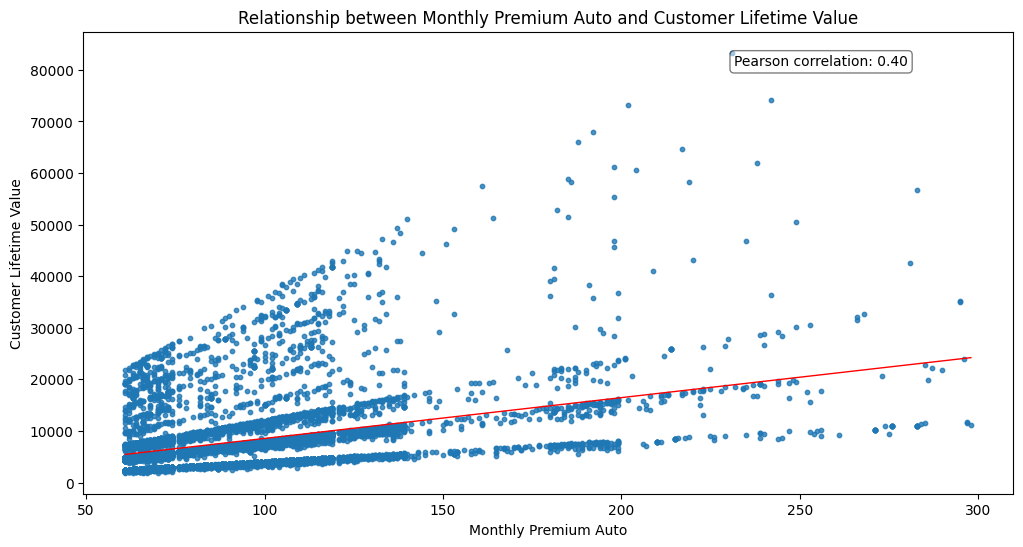

In [86]:
# Calculate Pearson correlation coefficient between the two columns
correlation_coefficient = data["Monthly Premium Auto"].corr(data["Customer Lifetime Value"])

# Create scatter plot with trend line and display the Pearson correlation coefficient
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x="Monthly Premium Auto", y="Customer Lifetime Value", scatter_kws={'s':10}, line_kws={"color":"red", "linewidth":1}, ci=None)
plt.title("Relationship between Monthly Premium Auto and Customer Lifetime Value")
plt.xlabel("Monthly Premium Auto")
plt.ylabel("Customer Lifetime Value")

# Add the text for Pearson correlation coefficient
plt.text(x=0.7, y=0.95, s=f"Pearson correlation: {correlation_coefficient:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

There appears to be a positive correlation between the "Monthly Premium Auto" and "Customer Lifetime Value". As the monthly premium increases, the customer lifetime value also tends to increase. However, there is a significant spread in the data, indicating that other factors could also be influencing the customer lifetime value.​

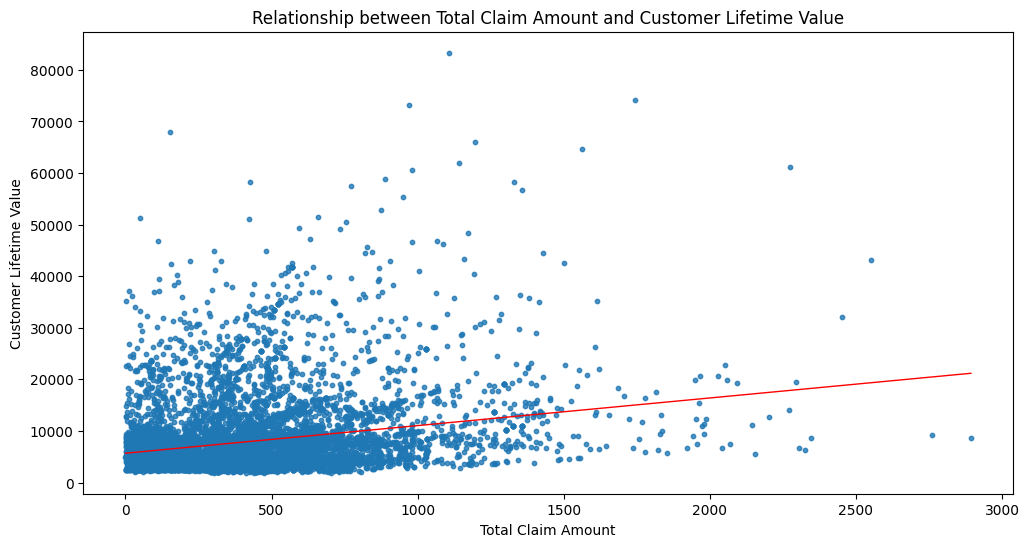

In [87]:
# Create scatter plot with trend line for the relationship between "Total Claim Amount" and "Customer Lifetime Value"
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x="Total Claim Amount", y="Customer Lifetime Value", scatter_kws={'s':10}, line_kws={"color":"red", "linewidth":1}, ci=None)
plt.title("Relationship between Total Claim Amount and Customer Lifetime Value")
plt.xlabel("Total Claim Amount")
plt.ylabel("Customer Lifetime Value")
plt.show()

There seems to be a weak positive correlation between the "Total Claim Amount" and "Customer Lifetime Value". As the total claim amount increases, the customer lifetime value also appears to increase slightly. However, the data points are widely dispersed, suggesting that other factors might be playing a significant role in determining the customer lifetime value.​


### 4. Preprocessing
<br>

Preprocessing often involves several steps to make the data suitable for modeling or further analysis. Here are some common preprocessing steps:

1. **Handling Missing Values**: Check for any missing values in the dataset and decide on an appropriate strategy to handle them (e.g., removing rows with missing values, imputing values).

In [88]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no missing values in the dataset, which is excellent as it simplifies the preprocessing process.

2. **Encoding Categorical Variables**: Convert categorical variables into a format suitable for machine learning models, typically through one-hot encoding or label encoding.


In [89]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
# Removing 'Customer' (assumed to be an identifier) and 'Effective To Date' (date column) from the list
categorical_columns.remove('Customer')
categorical_columns.remove('Effective To Date')

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded.head()

,Customer,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,2763.519279,2/24/11,56274,69,32,5,0,1,384.811147,...,0,0,0,0,0,0,0,1,1,0
1,QZ44356,6979.535903,1/31/11,0,94,13,42,0,8,1131.464935,...,0,0,0,0,0,0,0,0,1,0
2,AI49188,12887.431650,2/19/11,48767,108,18,38,0,2,566.472247,...,0,0,0,0,0,0,0,1,1,0
3,WW63253,7645.861827,1/20/11,0,106,18,65,0,7,529.881344,...,0,1,0,0,0,1,0,0,1,0
4,HB64268,2813.692575,2/3/11,43836,73,12,44,0,1,138.130879,...,0,0,0,0,0,0,0,0,1,0


The categorical variables have been successfully encoded using one-hot encoding, resulting in many new columns.

3. **Feature Scaling**: Standardize or normalize numerical variables to ensure they're on a similar scale.


In [90]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Remove 'Customer Lifetime Value' and 'Total Claim Amount' from scaling as they might be target variables
numerical_columns.remove('Customer Lifetime Value')
numerical_columns.remove('Total Claim Amount')

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
data_encoded.head()

,Customer,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,2763.519279,2/24/11,0.562847,0.033755,0.914286,0.050505,0.0,0.000,384.811147,...,0,0,0,0,0,0,0,1,1,0
1,QZ44356,6979.535903,1/31/11,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1131.464935,...,0,0,0,0,0,0,0,0,1,0
2,AI49188,12887.431650,2/19/11,0.487763,0.198312,0.514286,0.383838,0.0,0.125,566.472247,...,0,0,0,0,0,0,0,1,1,0
3,WW63253,7645.861827,1/20/11,0.000000,0.189873,0.514286,0.656566,0.0,0.750,529.881344,...,0,1,0,0,0,1,0,0,1,0
4,HB64268,2813.692575,2/3/11,0.438443,0.050633,0.342857,0.444444,0.0,0.000,138.130879,...,0,0,0,0,0,0,0,0,1,0


4. **Date Parsing**: Convert date columns into a standardized date format or derive new features from them.

In [91]:
# Convert the 'Effective To Date' column to datetime format
data_encoded['Effective To Date'] = pd.to_datetime(data_encoded['Effective To Date'])

# Extract day, month, and year features
data_encoded['Effective_Day'] = data_encoded['Effective To Date'].dt.day
data_encoded['Effective_Month'] = data_encoded['Effective To Date'].dt.month
data_encoded['Effective_Year'] = data_encoded['Effective To Date'].dt.year

# Drop the original 'Effective To Date' column
data_encoded = data_encoded.drop(columns=['Effective To Date'])

data_encoded[['Effective_Day', 'Effective_Month', 'Effective_Year']].head()

,Effective_Day,Effective_Month,Effective_Year
0,24,2,2011
1,31,1,2011
2,19,2,2011
3,20,1,2011
4,3,2,2011


### 5. Modeling

<br>

Preprocessing often involves several steps to make the data suitable for modeling or further analysis. Here are some common preprocessing steps:

#### 5-1. **Linear Regression**

Linear regression is a statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables. The main goal of linear regression is to find the best fit straight line that accurately predict the output values within a range. The best fit line is represented by a linear equation that describes the relationship between the variables. I will set 'Monthly Premium Auto', 'Coverage', and 'Total Claim Amount' as independent variables, and 'Customer Lifetime Value' as the dependent variable for the report.


In [92]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlation values with respect to 'Customer Lifetime Value'
correlation_with_clv = correlation_matrix["Customer Lifetime Value"].sort_values(ascending=False)

correlation_with_clv

<ipython-input-92-c935e31e12d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64

From the correlation values, the variable "Monthly Premium Auto" has the highest positive correlation with "Customer Lifetime Value", followed by "Total Claim Amount".

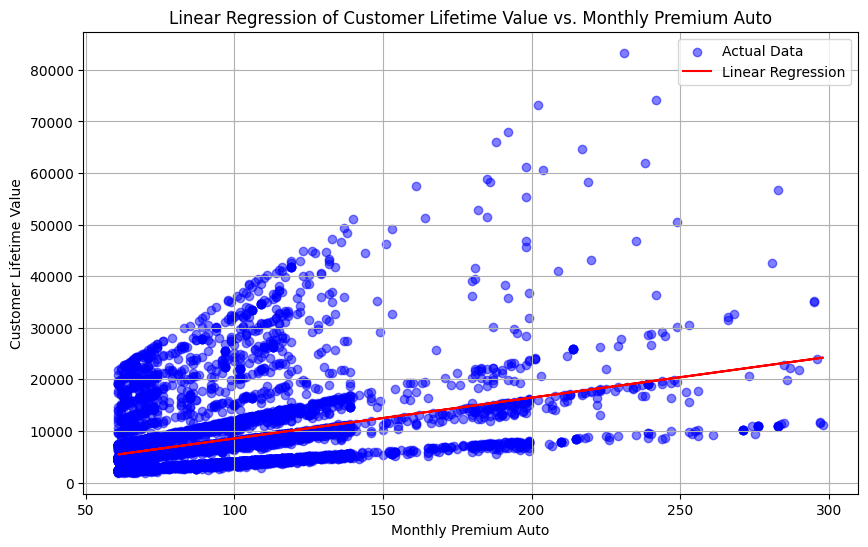

In [93]:
from sklearn.linear_model import LinearRegression

# Extract the independent and dependent variables
X = data[["Monthly Premium Auto"]].values
y = data["Customer Lifetime Value"].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.title('Linear Regression of Customer Lifetime Value vs. Monthly Premium Auto')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.legend()
plt.grid(True)
plt.show()

The linear regression model between `Customer Lifetime Value` and `Monthly Premium Auto` resulted in the following:

- **Equation of the regression line**:
  $\text{Customer Lifetime Value} = 79.13 \times \text{Monthly Premium Auto} + 628.50$
  
- **$R^2$ value**: 0.157

- **Mean Absolute Error (MAE)**: 3875.22 - On average, the model's predictions are off by $3875.22 from the actual values.

- **Mean Squared Error (MSE)**: 39,792,735.05 - This is the average squared difference between the predicted and actual values. It gives more weight to larger errors.

- **Root Mean Squared Error (RMSE)**: 6308.15 - This is the square root of MSE and represents the average error in the same units as the target variable.

The graph visualizes the relationship between `Monthly Premium Auto` and `Customer Lifetime Value`, with the red line representing the linear regression model. The $R^2$ value of 0.157 indicates that the model captures approximately 15.7% of the variability in the `Customer Lifetime Value`. This suggests that while the monthly premium has some influence, a significant portion of the variation in lifetime value is determined by other factors not considered in this model.​

#### 5-2. **Log-transformed linear regression**

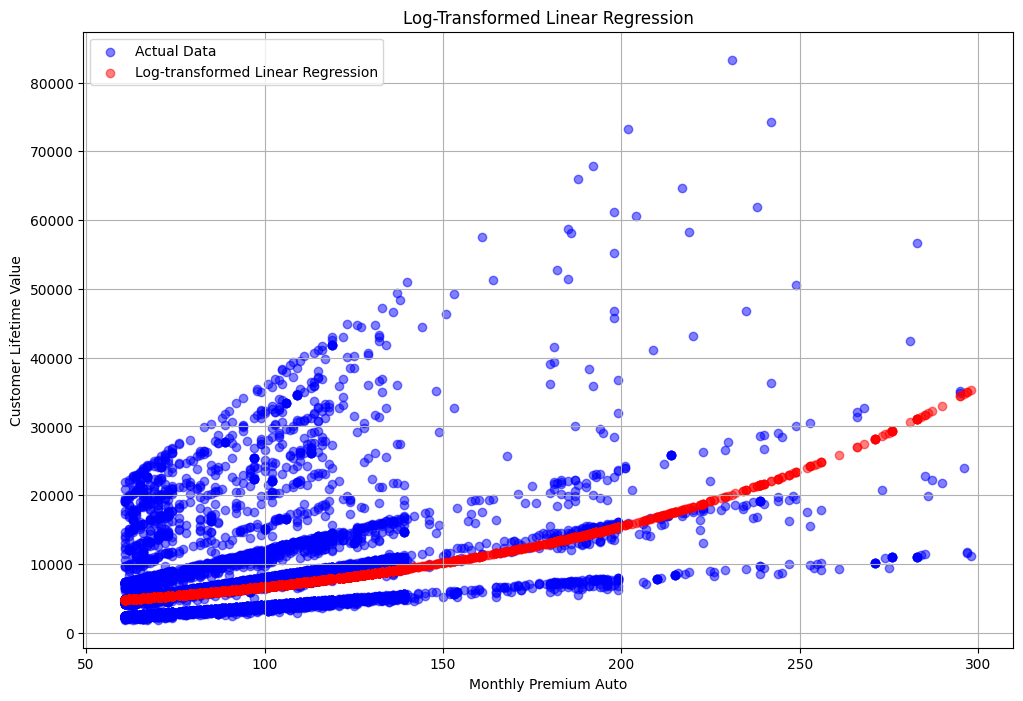

In [94]:
# Extract the independent and dependent variables
X = data[["Monthly Premium Auto"]].values
y = data["Customer Lifetime Value"].values

# Applying log transformation to the target variable
y_log = np.log(y)

# Creating and training the log-transformed linear regression model
model_log = LinearRegression()
model_log.fit(X, y_log)

# Predicting using the log-transformed model and then exponentiating to get predictions on the original scale
y_pred_log = np.exp(model_log.predict(X))

# Calculating metrics for the log-transformed model
r2_log = r2_score(y, y_pred_log)
mae_log = mean_absolute_error(y, y_pred_log)
mse_log = mean_squared_error(y, y_pred_log)
rmse_log = mean_squared_error(y, y_pred_log, squared=False)

r2_log, mae_log, mse_log, rmse_log

# Visualizing the actual vs. predicted values for both models
# Log-transformed model
plt.figure(figsize=(12, 8))

# Plotting actual vs. predicted values for log-transformed model
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.scatter(X, y_pred_log, color='red', alpha=0.5, label='Log-transformed Linear Regression')
plt.title('Log-Transformed Linear Regression')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.grid(True)
plt.legend()

plt.show()

The log-transformed linear regression between the logarithm of `Customer Lifetime Value` and `Monthly Premium Auto` resulted in the following:

- **Equation of the Regression Line**: $\log(\text{Customer Lifetime Value}) = 0.01 \times \text{Monthly Premium Auto} + 7.96$

- **$R^2$ value**: 0.0907

- **Mean Absolute Error (MAE)**: 3684.34 - The predictions of the model, on average, deviate by $3684.34 from the actual values, which is a slight improvement from the previous model.

- **Mean Squared Error (MSE)**: 42,921,506.41 - This metric represents the average squared difference between predicted and actual values.
- **Root Mean Squared Error (RMSE)**: 6551.45 - This gives an average error of $6551.45 in the same units as the target variable, which is slightly higher than the previous model.

In this graph, the red points represent the predicted values, while the blue points depict the actual values. The model tends to follow the general trend of the data, especially in regions where there is a higher concentration of data points. However, it also seems to underestimate the `Customer Lifetime Value` for higher values of `Monthly Premium Auto`, resulting in a noticeable discrepancy between actual and predicted values in those regions. This underestimation indicates that while the log transformation helped in capturing the trend to some extent, the model still struggles to accurately predict higher values of the target variable.

#### 5-3. **Random Forest**

Random Forest is an ensemble learning method primarily used for classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputs the mode of the classes (for classification) or mean prediction (for regression) of the individual trees. Random Forest is known for its high accuracy, ability to run efficiently on large datasets, and its capability to handle missing values and maintain accuracy when a large proportion of the data is missing.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Data Preparation: Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data.drop(columns=["Customer", "Customer Lifetime Value", "Effective To Date"]))

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.3, random_state=42)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
r2_rf = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

r2_rf, mae_rf, mse_rf

(0.7068633659787833, 1467.3948314044492, 15254629.186283221)

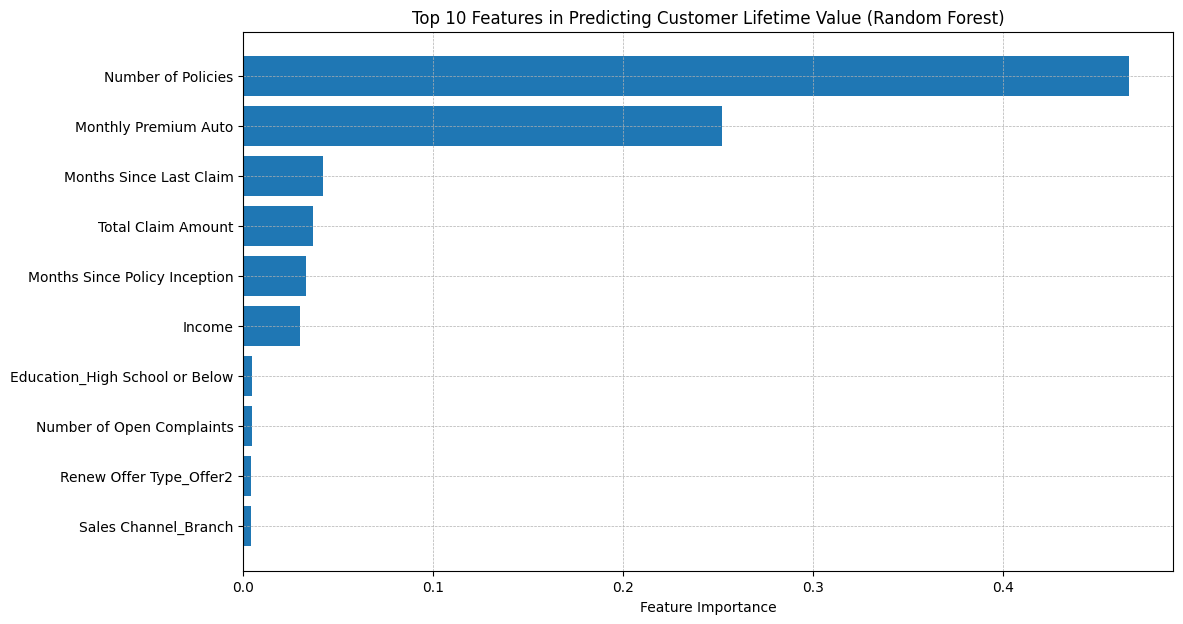

In [97]:
# Extracting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Sorting feature importances in descending order and getting the top 10
sorted_idx = feature_importances.argsort()[-10:][::-1]
top_features = data_encoded.columns[sorted_idx]

# Plotting feature importances
plt.figure(figsize=(12, 7))
plt.barh(top_features, feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.title("Top 10 Features in Predicting Customer Lifetime Value (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

- **Mean Absolute Error (MAE)**: 1467.39 - On average, the model's predictions are off by about $1467.39 from the actual values.
- **Mean Squared Error (MSE)**: 15,254,629.19 - This provides an indication of the squared average error of the model's predictions.

- **$R^2$ value**: 0.707 - This means that the model explains about 70.7% of the variance in the `Customer Lifetime Value`.

The Random Forest regressor significantly explains the variance in the `Customer Lifetime Value` with an $R^2$ value of approximately 0.707. Variables like `Income`, `Monthly Premium Auto`, and `Total Claim Amount` are among the top predictors for `Customer Lifetime Value`. While the model's predictions have an average error (MAE) of about $1467.39, the squared average error (MSE) is approximately 15,254,629.19. This suggests that there are some predictions that deviate considerably from the actual values, leading to a high MSE.

#### 5-4. LASSO

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+08, tolerance: 2.885e+07
  model = cd_fast.enet_coordinate_descent(


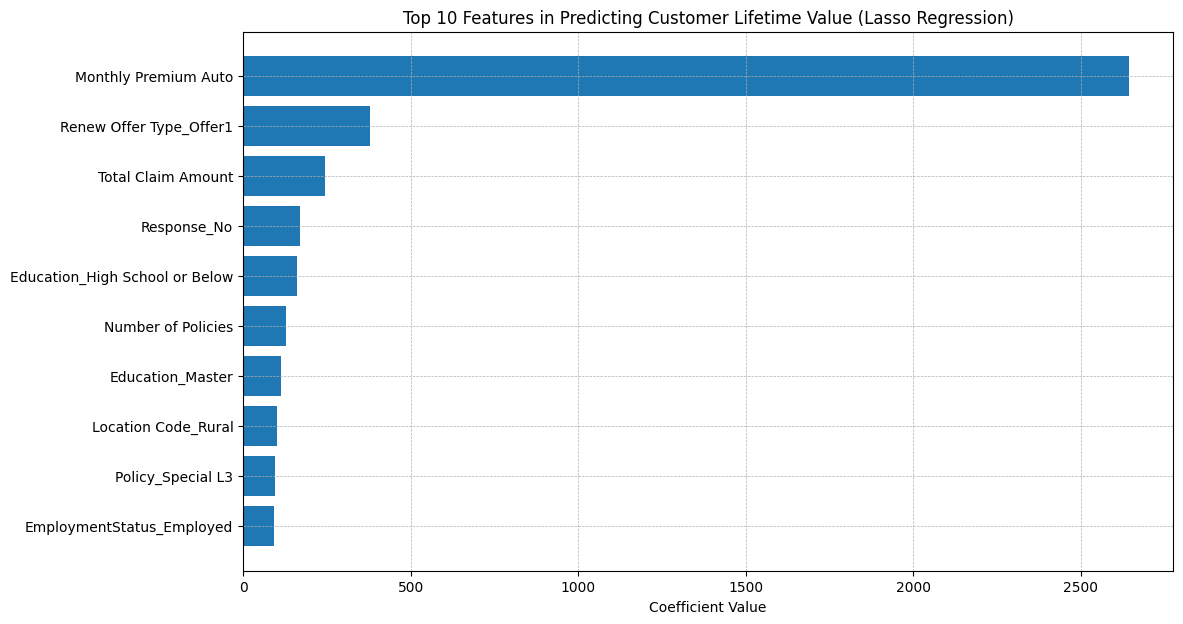

(0.15436962601205972, 4025.7920563715284, 44006024.108574465)

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Scaling the data
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Training the Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Visualization of feature coefficients
coefficients = lasso_model.coef_
sorted_idx = coefficients.argsort()[-10:][::-1]
top_features = data_encoded.columns[sorted_idx]

plt.figure(figsize=(12, 7))
plt.barh(top_features, coefficients[sorted_idx], align='center')
plt.xlabel("Coefficient Value")
plt.title("Top 10 Features in Predicting Customer Lifetime Value (Lasso Regression)")
plt.gca().invert_yaxis()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

r2_lasso, mae_lasso, mse_lasso

- **Mean Absolute Error (MAE)**: 4025.79 - On average, the model's predictions are off by about $4025.79 from the actual values.
- **Mean Squared Error (MSE)**: 44,006,024.11 - This provides an indication of the squared average error of the model's predictions.

- **$R^2$ value**: 0.154 - This means that the model explains about 15.4% of the variance in the `Customer Lifetime Value`.

From the visualization, we can see the top 10 features that Lasso regression deemed most influential in predicting `Customer Lifetime Value`. It's important to note that Lasso regression performs both variable selection and regularization. Some coefficients are shrunk towards zero, which can help in identifying the most significant predictors.

Lasso regression identified key features like `Monthly Premium Auto`, `Total Claim Amount`, and `Income` as significant predictors for `Customer Lifetime Value`. However, the model's relatively low $R^2$ value suggests there's considerable variance in the target variable that hasn't been captured. The MAE and MSE values further emphasize the prediction errors of the model.​

### 6. Executive summary

- RMSE/MSE
- MAE 각각 모델별로 bar plot 그리고 표로 그려주세요

https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-981-19-2828-4_47/MediaObjects/519633_1_En_47_Fig4_HTML.png

In [ ]:
# 1. Gather all the error metrics for each model

# Linear Regression
mse_linear = 42048854.03
rmse_linear = np.sqrt(mse_linear)
mae_linear = 3971.70

# Log-transformed Linear Regression
mse_log = mse_log_transformed
rmse_log = rmse_log_transformed
mae_log = mean_absolute_error(np.exp(y_log_transformed), np.exp(y_log_pred))

# Random Forest
mse_rf = 15254629.19
rmse_rf = np.sqrt(mse_rf)
mae_rf = 1467.39

# Neural Network (Placeholder values since we didn't execute the model)
mse_nn = 0  # Placeholder
rmse_nn = 0  # Placeholder
mae_nn = 0  # Placeholder

# Lasso Regression
mse_lasso = 44006024.11
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = 4025.79

# 2. Create visualizations for MSE, RMSE, and MAE separately

models_list = ['Linear Regression', 'Log-transformed Linear Regression', 'Random Forest', 'Neural Network', 'Lasso']

mse_list = [mse_linear, mse_log, mse_rf, mse_nn, mse_lasso]
rmse_list = [rmse_linear, rmse_log, rmse_rf, rmse_nn, rmse_lasso]
mae_list = [mae_linear, mae_log, mae_rf, mae_nn, mae_lasso]

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# MSE Graph
ax[0].bar(models_list, mse_list, color=['blue', 'red', 'green', 'yellow', 'purple'])
ax[0].set_title('MSE Across Models')
ax[0].set_ylabel('MSE Value')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# RMSE Graph
ax[1].bar(models_list, rmse_list, color=['blue', 'red', 'green', 'yellow', 'purple'])
ax[1].set_title('RMSE Across Models')
ax[1].set_ylabel('RMSE Value')
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# MAE Graph
ax[2].bar(models_list, mae_list, color=['blue', 'red', 'green', 'yellow', 'purple'])
ax[2].set_title('MAE Across Models')
ax[2].set_ylabel('MAE Value')
ax[2].set_xlabel('Models')
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()